# ML Nr 2: Google Analytics Customer Revenue Prediction

## Frame the problem and look at the big picture

Dette maskinlæringsprosjektet handler om å utvikle og trene en modell til å predikere samlet inntekt for filmer ved billettkontorer på verdensbasis. Notebooken er strukturert etter disse åtte punktene:
1. Frame the problem and look at the big picture
2. Get the data
3. Explore the data to gain insights
4. Prepare the data to better expose the underlying data patterns to machine learning algorithms
5. Explore many different models and short-list the best ones
6. Fine-tune your models and combine them into a great solution
7. Present your solution
8. Launch, monitor and maintain your system


## Get the data

In [1]:
# Import necesary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import ast

# Automatically reload modules defined in external files
%reload_ext autoreload
%autoreload 2

# Display plots directly in the notebook
%matplotlib inline

In [2]:
# Data gitt i oppgaven
print(os.listdir("../data"))

['.DS_Store', 'test.csv', 'train.csv', 'sample_submission.csv']


In [3]:
# Bruker pandas til å lese filene
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
sampleSubmission = pd.read_csv('../data/sample_submission.csv')

## Explore the data to gain insights

In [4]:
# Se første fem rader i treningssettet
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [5]:
# Se første fem rader i testsettet
test.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4398 non-null   int64  
 1   belongs_to_collection  877 non-null    object 
 2   budget                 4398 non-null   int64  
 3   genres                 4382 non-null   object 
 4   homepage               1420 non-null   object 
 5   imdb_id                4398 non-null   object 
 6   original_language      4398 non-null   object 
 7   original_title         4398 non-null   object 
 8   overview               4384 non-null   object 
 9   popularity             4398 non-null   float64
 10  poster_path            4397 non-null   object 
 11  production_companies   4140 non-null   object 
 12  production_countries   4296 non-null   object 
 13  release_date           4397 non-null   object 
 14  runtime                4394 non-null   float64
 15  spok

In [8]:
train.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


Hvis man ser på raden "count" ser man at "runtime" har noen manglende verdier i forhold til de andre numeriske kolonnene.

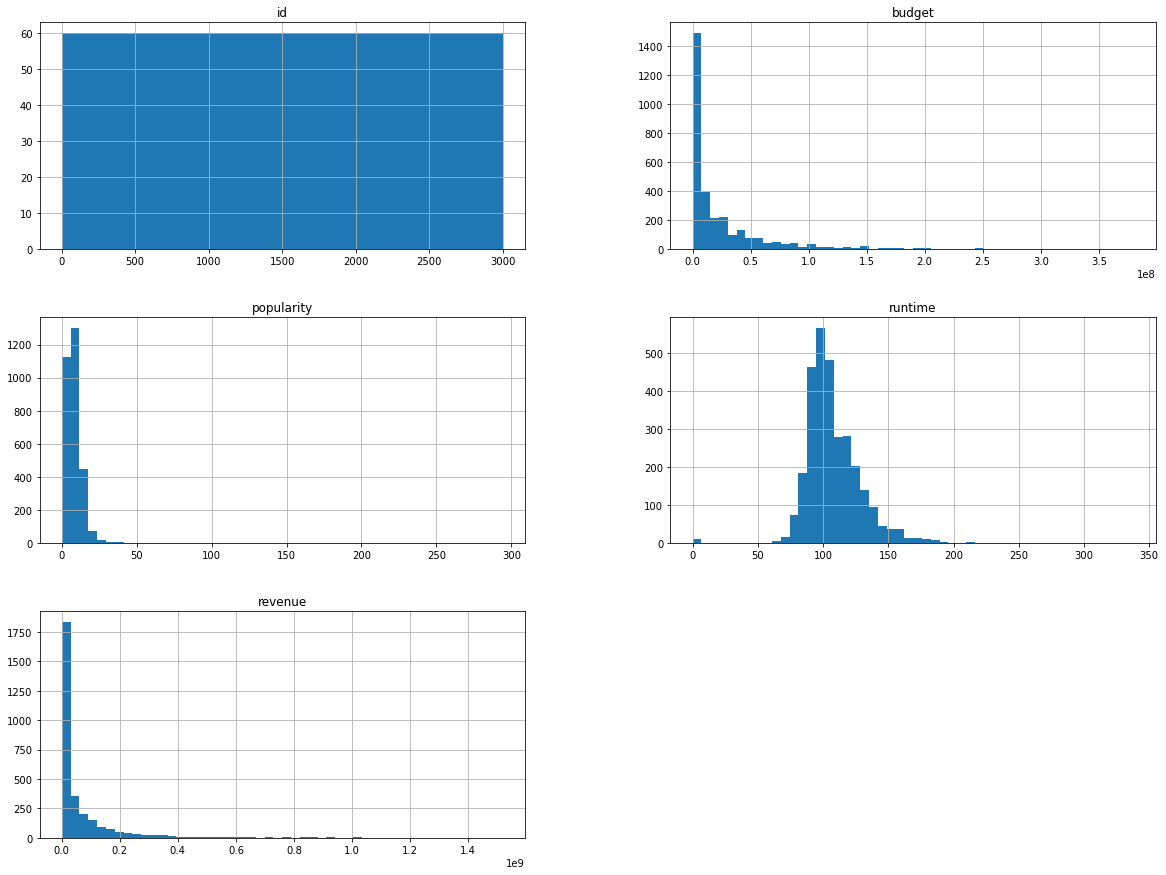

In [9]:
# Histogram på numeriske kolonner i treningssettet
train.hist(bins=50, figsize=(20,15))
plt.show()

## Prepare the data to better expose the underlying data patterns to machine learning algorithms

### Data cleaning

In [10]:
# Henter revenue og dropper kolonnen fra treningssettet
labels = train["revenue"].copy()
train = train.drop("revenue", axis=1)

#### Fjerner irrelevante kolonner

I datasettet er det en del kolonner vi tenker er irrelevante for prediksjonen av "revenue". Vi fjerner derfor disse fra trenings- og testsettet.

In [11]:
# Fjerner unyttige kolonner
list_drop = ["homepage", "imdb_id", "original_title", "overview", "poster_path", "tagline", "title", "status"
             , "crew"];
train = train.drop(list_drop, axis=1)
train = train.drop('id', axis=1)
test = test.drop(list_drop, axis=1)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  604 non-null    object 
 1   budget                 3000 non-null   int64  
 2   genres                 2993 non-null   object 
 3   original_language      3000 non-null   object 
 4   popularity             3000 non-null   float64
 5   production_companies   2844 non-null   object 
 6   production_countries   2945 non-null   object 
 7   release_date           3000 non-null   object 
 8   runtime                2998 non-null   float64
 9   spoken_languages       2980 non-null   object 
 10  Keywords               2724 non-null   object 
 11  cast                   2987 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 281.4+ KB


#### Belongs to Collection

Det som virker mest nyttig for oss er om filmen hører til en kolleksjon eller ikke. Gjør derfor om kolonnen til 1 dersom den hører til en kolleksjon og 0 hvis ikke.

In [13]:
train["belongs_to_collection"] = np.where(pd.notnull(train["belongs_to_collection"]), 1, 0)
test["belongs_to_collection"] = np.where(pd.notnull(test["belongs_to_collection"]), 1, 0)
train["belongs_to_collection"].head()

0    1
1    1
2    0
3    0
4    0
Name: belongs_to_collection, dtype: int64

#### Fikse strenger

Noen kolonner inneholder lister av strenger. Her har vi kun lyst til å vise frem "name".

In [14]:
def fix_strings(s):
    try:
        return ast.literal_eval(s)[0]['name']
    except:
        pass

In [15]:
train.genres = train.genres.apply(fix_strings)
train.production_companies = train.production_companies.apply(fix_strings)
train.production_countries = train.production_countries.apply(fix_strings)
train.spoken_languages = train.spoken_languages.apply(fix_strings)
train.Keywords = train.Keywords.apply(fix_strings)
train.cast = train.cast.apply(fix_strings)

test.genres = test.genres.apply(fix_strings)
test.production_companies = test.production_companies.apply(fix_strings)
test.production_countries = test.production_countries.apply(fix_strings)
test.spoken_languages = test.spoken_languages.apply(fix_strings)
test.Keywords = test.Keywords.apply(fix_strings)
test.cast = test.cast.apply(fix_strings)

In [16]:
train.head()

,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,Keywords,cast
0,1,14000000,Comedy,en,6.575393,Paramount Pictures,United States of America,2/20/15,93.0,English,time travel,Rob Corddry
1,1,40000000,Comedy,en,8.248895,Walt Disney Pictures,United States of America,8/6/04,113.0,English,coronation,Anne Hathaway
2,0,3300000,Drama,en,64.299990,Bold Films,United States of America,10/10/14,105.0,English,jazz,Miles Teller
3,0,1200000,Thriller,hi,3.174936,None,India,3/9/12,122.0,English,mystery,Vidya Balan
4,0,0,Action,ko,1.148070,None,South Korea,2/5/09,118.0,한국어/조선말,None,Kim Kang-woo


#### Release date

I denne kolonnen vises "release_date". Her ønsker vi å ta en snarvei ved å kun ta med utgivelsesår.

In [17]:
# Funksjon hentet fra Kaggle: https://www.kaggle.com/artgor/eda-feature-engineering-and-model-interpretation
# Funksjonen gjør årståll fra to siffer til fire siffer.
def fix_date(x):
    year = x.split('/')[2]
    if int(year) <= 19:
        return x[:-2] + '20' + year
    else:
        return x[:-2] + '19' + year

In [18]:
train['release_date'] = train['release_date'].apply(lambda x: fix_date(x))

In [19]:
train['release_date'].mode()

0    9/10/2010
1    9/10/2015
dtype: object

In [20]:
# I testsettet manglet det noen verdier, så der satte vi release_date til den hyppigste datoen i treningssettet
test.loc[test['release_date'].isnull() == True, 'release_date'] = '9/10/10'
test['release_date'] = test['release_date'].apply(lambda x: fix_date(x))

In [21]:
# Gjør om kolonnene i treningssettet til kun utgivelsesår
for index in range(3000):
    train['release_date'][index] = train['release_date'][index][-4:]

<ipython-input-21-b476e60f4692>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['release_date'][index] = train['release_date'][index][-4:]


In [22]:
# Gjør om kolonnene i testsettet til kun utgivelsesår
for index in range(4398):
    test['release_date'][index] = test['release_date'][index][-4:]

<ipython-input-22-a1fd069571de>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['release_date'][index] = test['release_date'][index][-4:]


In [23]:
# Endrer navn til "release_year" og type til int
train.rename(columns={'release_date': 'release_year'}, inplace=True)
test.rename(columns={'release_date': 'release_year'}, inplace=True)
train = train.astype({"release_year": int})
test = test.astype({"release_year": int})

### Missing Values

Maskinlæringsalgoritmer kan ikke kjøre med manglende verdier. Velger å bruke Simple imputer for å løse dette på numeriske kolonner. Velger å fylle manglende verdier med medianen.

In [24]:
train_num = train[['belongs_to_collection', 'budget', 'popularity', 'release_year', 'runtime']]
imputer = SimpleImputer(strategy="median")
imputer.fit(train_num);
imputer.statistics_

array([0.0000000e+00, 8.0000000e+06, 7.3748615e+00, 2.0040000e+03,
       1.0400000e+02])

In [25]:
x = imputer.transform(train_num)
train_num_tr = pd.DataFrame(x, columns=train_num.columns, index=train.index)
train_num_tr.describe()

,belongs_to_collection,budget,popularity,release_year,runtime
count,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000
mean,0.201333,2.253133e+07,8.463274,1999.713000,107.854000
std,0.401063,3.702609e+07,12.104000,15.423313,22.079293
min,0.000000,0.000000e+00,0.000001,1921.000000,0.000000
25%,0.000000,0.000000e+00,4.018053,1993.000000,94.000000
50%,0.000000,8.000000e+06,7.374861,2004.000000,104.000000
75%,0.000000,2.900000e+07,10.890983,2011.000000,118.000000
max,1.000000,3.800000e+08,294.337037,2017.000000,338.000000


Nå er "count" på "runtime" blitt 3000 slik som de andre.

Når det gjelder kolonner med tekstverdier bruker vi fillna() til å fylle manglende verdier med 'None'.

In [26]:
train['genres'].fillna('None', inplace=True)
train['production_companies'].fillna('None', inplace=True)
train['production_countries'].fillna('None', inplace=True)
train['spoken_languages'].fillna('None', inplace=True)
train['Keywords'].fillna('None', inplace=True)
train['cast'].fillna('None', inplace=True)

test['genres'].fillna('None', inplace=True)
test['production_companies'].fillna('None', inplace=True)
test['production_countries'].fillna('None', inplace=True)
test['spoken_languages'].fillna('None', inplace=True)
test['Keywords'].fillna('None', inplace=True)
test['cast'].fillna('None', inplace=True)

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  3000 non-null   int64  
 1   budget                 3000 non-null   int64  
 2   genres                 3000 non-null   object 
 3   original_language      3000 non-null   object 
 4   popularity             3000 non-null   float64
 5   production_companies   3000 non-null   object 
 6   production_countries   3000 non-null   object 
 7   release_year           3000 non-null   int64  
 8   runtime                2998 non-null   float64
 9   spoken_languages       3000 non-null   object 
 10  Keywords               3000 non-null   object 
 11  cast                   3000 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 281.4+ KB


### Handling Text and Categorical Attributes

Maskinlæringsmodeller foretrekker at "features" er numeriske. I datasettet er det mange kolonner av type "object". Bruker OneHotEncoder for å gjør de numeriske.

In [28]:
train_cat = train[['genres', 'original_language', 'production_companies', 'production_countries', 'release_year',
                   'spoken_languages', 'Keywords', 'cast']]

train_cat.head()

,genres,original_language,production_companies,production_countries,release_year,spoken_languages,Keywords,cast
0,Comedy,en,Paramount Pictures,United States of America,2015,English,time travel,Rob Corddry
1,Comedy,en,Walt Disney Pictures,United States of America,2004,English,coronation,Anne Hathaway
2,Drama,en,Bold Films,United States of America,2014,English,jazz,Miles Teller
3,Thriller,hi,None,India,2012,English,mystery,Vidya Balan
4,Action,ko,None,South Korea,2009,한국어/조선말,None,Kim Kang-woo


In [29]:
encoder = OneHotEncoder()
train_cat_tr = encoder.fit_transform(train_cat)
train_cat_tr

<3000x3978 sparse matrix of type '<class 'numpy.float64'>'
	with 24000 stored elements in Compressed Sparse Row format>

### Feature Scaling

Maskinlæringsalgoritmer fungerer dårlig dersom variasjonen mellom verdiene i de ulike attributtene på treningssettet er store. Derfor lønner det seg å bruke StandardScaler for å skalere ned verdiene.

In [30]:
scaler = StandardScaler()
to_scale = train_num
scaler.fit_transform(to_scale)

array([[ 1.99170465, -0.23045256, -0.15599768,  0.99132711, -0.67276814],
       [ 1.99170465,  0.47187212, -0.01771439,  0.27800218,  0.23291614],
       [-0.50208247, -0.51948618,  4.61384865,  0.92647939, -0.12935757],
       ...,
       [-0.50208247,  1.14718432,  0.49736238, -0.24077959,  0.54990563],
       [-0.50208247,  0.5258971 ,  0.6000891 ,  0.27800218, -0.80862078],
       [-0.50208247,  0.33680969,  0.16929745,  0.73193622, -0.08407336]])

Slik blir de numeriske kolonnene seende ut etter skaleringen.

### Transformation Pipelines

For å gjøre om treningssettet vårt i riktig rekkefølge bruker vi Pipelines. Første pipeline SimpleImputer() og StandardScaler() på numeriske kolonner.

In [31]:
num_pipeline = Pipeline([
    ('num_imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

train_num_tr = num_pipeline.fit_transform(train_num)

In [32]:
train_num_tr

array([[ 1.99170465, -0.23045256, -0.15599768,  0.99132711, -0.6728692 ],
       [ 1.99170465,  0.47187212, -0.01771439,  0.27800218,  0.23310791],
       [-0.50208247, -0.51948618,  4.61384865,  0.92647939, -0.12928293],
       ...,
       [-0.50208247,  1.14718432,  0.49736238, -0.24077959,  0.5501999 ],
       [-0.50208247,  0.5258971 ,  0.6000891 ,  0.27800218, -0.80876577],
       [-0.50208247,  0.33680969,  0.16929745,  0.73193622, -0.08398408]])

In [33]:
cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown = 'ignore')),
])

train_cat_tr = cat_pipeline.fit_transform(train_cat)

In [57]:
train_cat_tr

<3000x3978 sparse matrix of type '<class 'numpy.float64'>'
	with 24000 stored elements in Compressed Sparse Row format>

In [34]:
num_attribs = list(train_num)
cat_attribs = list(train_cat)

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

train_prepared = full_pipeline.fit_transform(train)

In [35]:
train_prepared

<3000x3983 sparse matrix of type '<class 'numpy.float64'>'
	with 39000 stored elements in Compressed Sparse Row format>

## Explore many different models and short-list the best ones

### Linear Regression

Første modell vi gjør prediksjoner på er Linear Regression.

In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_prepared, labels)

LinearRegression()

In [37]:
some_data = train.iloc[:5]
some_labels = labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lr.predict(some_data_prepared))

Predictions: [12314712.34436422 95149798.02233562 13091738.60431726 15999900.93939274
  3923877.22199173]


In [38]:
print("Labels:", list(some_labels))

Labels: [12314651, 95149435, 13092000, 16000000, 3923970]


Hvis vi sammenligner prediksjonene med de faktiske verdiene ser modellen ganske lovende ut. Sjekker nå med kryssvalidering.

In [39]:
from sklearn.model_selection import cross_val_score
lr_scores = cross_val_score(lr, train_prepared, labels, scoring="neg_mean_squared_error", cv=10)
lr_rmse_scores = np.sqrt(-lr_scores)

In [40]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lr_rmse_scores)

Scores: [3.12992242e+08 3.69243186e+08 4.09934375e+08 3.47850601e+08
 2.79927549e+08 3.09449081e+08 3.23655704e+08 2.73840577e+08
 3.82033884e+08 3.76254450e+08]
Mean: 338518164.84934247
Standard deviation: 43338861.575834


Ser her at denne modellen gir et standardavvik på 43 millioner. Konkluderer med at dette er en dårlig modell til dette datasettet. Neste modell vi gjør prediksjoner på er Decision Tree Regressor.

### Decision Tree Regressor

In [41]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(train_prepared, labels)
print("Predictions:", dtr.predict(some_data_prepared))

Predictions: [12314651. 95149435. 13092000. 16000000.  3923970.]


In [42]:
print("Labels:", list(some_labels))

Labels: [12314651, 95149435, 13092000, 16000000, 3923970]


Når vi ser på prediksjonene til denne modellen er resultat prikk lik de faktiske verdiene. Det kan bety at denne modellen er en "overfitted model". Sjekker med kryssvalidering her også.

In [43]:
dtr_scores = cross_val_score(dtr, train_prepared, labels, scoring="neg_mean_squared_error", cv=10)
dtr_rmse_scores = np.sqrt(-dtr_scores)

display_scores(dtr_rmse_scores)

Scores: [9.31477204e+07 9.24504629e+07 1.03989065e+08 9.60361498e+07
 8.37554485e+07 1.00248939e+08 8.75467220e+07 9.75245572e+07
 9.12033653e+07 9.33418222e+07]
Mean: 93924425.27516676
Standard deviation: 5597494.094384387


Ser her at modellen gir et lavt standardavvik, noe som er veldig bra. Gjør også prediksjoner på Random Forest Regressor.

### Random Forest Regressor

In [44]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(train_prepared, labels)
print("Predictions:", rfr.predict(some_data_prepared))

Predictions: [32301487.47 95908542.17 49979484.11  9873288.83  2784104.37]


In [45]:
print("Labels:", list(some_labels))

Labels: [12314651, 95149435, 13092000, 16000000, 3923970]


Disse prediksjonene ser lovende ut. Sjekker med kryssvalidering også her.

In [46]:
rfr_scores = cross_val_score(rfr, train_prepared, labels, scoring="neg_mean_squared_error", cv=10)
rfr_rmse_scores = np.sqrt(-rfr_scores)

display_scores(rfr_rmse_scores)

Scores: [74057338.59441294 73410304.2048841  91482630.03702714 73206625.79380327
 73378466.58268948 88920533.67756674 63116128.57233654 79123048.75080083
 81112840.20673724 62236837.71544933]
Mean: 76004475.41357076
Standard deviation: 9072601.639883637


Ser her at også denne modellen gir et lavt standardavvik. Etter test på tre modeller konkluderer vi med at Decision Tree Regressor kom best ut av kryssvalideringen.

## Fine-tune your models and combine them into a great solution

Vi velger Decision Tree Regressor som vår modell, men må undersøke hvilke parametre som gir beste løsningen. Til dette bruker vi GridSearchCV.

In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = {"min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }

dtr = DecisionTreeRegressor()

grid_search = GridSearchCV(dtr, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(train_prepared, labels);

In [48]:
# Viser parametre for beste resultat
grid_search.best_params_

{'max_depth': 8,
 'max_leaf_nodes': 100,
 'min_samples_leaf': 20,
 'min_samples_split': 10}

In [49]:
model = grid_search.best_estimator_
model

DecisionTreeRegressor(max_depth=8, max_leaf_nodes=100, min_samples_leaf=20,
                      min_samples_split=10)

In [50]:
model_scores = cross_val_score(model, train_prepared, labels, scoring="neg_mean_squared_error", cv=10)
model_rmse_scores = np.sqrt(-model_scores)

display_scores(model_rmse_scores)

Scores: [84919774.82863382 82898559.85277633 97273202.08888052 82524071.71669844
 77708661.73577343 97317779.19765098 77545191.11379094 87965691.32418911
 89095001.06993341 76733179.80079056]
Mean: 85398111.27291176
Standard deviation: 7169166.059364134


Her kan vi se at standardavviket har blitt enda lavere etter gjennomføringen av GridSearchCV. Dette blir vår ferdig trente modell. Nå kan vi kjøre modellen på testsettet.

In [51]:
test_prepared = full_pipeline.transform(test)
revenue = model.predict(test_prepared)
revenue

/Users/morten/opt/anaconda3/envs/dat158/lib/python3.8/site-packages/sklearn/compose/_column_transformer.py:437: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "


array([ 4524601.56      , 13051555.68      ,  6654541.7852349 , ...,
       53671645.15      , 16885983.5       , 15185024.58974359])

## Present your solution

Hovedfokuset med dette maskinlæringsprosjektet har vært på deploymentdelen. Derfor har vi tatt noen "snarveier" på veien til en ferdig modell. Vi har blant annet droppet et par kolonner, og i tillegg gjort endringer på dataen i noen kolonner. En konsekvens av disse "snarveiene" er funksjonen som fikser strenger tar kun med én verdi. Hvis vi tar "genres" kolonnen som et eksempel kan filmer ha flere sjangre, men funksjonen som fikser strenger beholder kun én sjanger.

I dette maskinlæringsprosjektet har vi lært hvordan vi setter maskinlæringsmodeller i drift. I punkt fem undersøkte vi ulike modeller for prosjektet. Ut fra kryssvalidering fikk to modeller ganske god score. Men vi valgte Decision Tree Regressor, ettersom den fungerte best.

I deploymentdelen valgte vi å kun ha input verdier på fire "features": budget, release_year, cast og genres. Disse ble valgt siden vi tenkte disse hadde størst påvirkning på inntekten. Alle de andre "features" får medianen som verdi dersom de er numeriske, og den hyppigste dersom de er kategoriske. Siden de fleste verdiene blir satt til bestemte verdier "bak kulissene" er dette ikke den mest treffsikre modellen. Den har med andre ord noen begrensninger.

## Launch, monitor and maintain your system

Vi har nå laget en webapplikasjon med de featuresene vi synes var viktigst. Uten å vite revenue vi faktisk sammenligner med vet vi ikke hvor nærmt vi er, men vi baserer oss på Kaggle scoren som ble 2,64. Vi har vært i stand til å lage en maskinlæringsmodell som ikke helt enda kan konkurrere med den manuelle vurderingen, men som kan med jevnlig trening bli mer presis.

Hadde datasettet vært et noe vi jevnlig hadde fått inn nye data på, måtte vi (som overskriften sier) overvåket tallene slik at man trener modellen til å bli best mulig. En konsekvens av en så enkel modell vi har publisert er at modellen kan bli underfitted, men vi tror at disse featuresene vil gjøre risikoen mindre for dette. 

En løsning for dette ville selvfølgelig vært å tilrettelegge for å kunne legge inn flere features. Dette vil øke risikoen for å få en overfitted modell som gjør det bra på nåværende sett, men dårlig på nye data. Det er derfor viktig å overvåke modellen - overvåkning er også viktig for å forhindre at man får inn vilkårlige/gale verdier som i sin helhet kan ha stor innvirkning på resultatet.

Over tid kan for eksempel en faktor påvirke revenue mer enn det den gjør i dag. Etter noe tid må man da gå gjennom settet og kanskje legge til flere features, eller forandre verdien på features man ikke har i webapplikasjonen (medianverdier forandrer seg gjerne etter noe tid). Modeller har en tendens til å "råtne" over tid dersom de ikke på jevnlig basis trenes på nye data.

## Submission

In [52]:
# Ønsket format på kaggle
sampleSubmission.head()

,id,revenue
0,3001,1000000
1,3002,1000000
2,3003,1000000
3,3004,1000000
4,3005,1000000


In [53]:
submission = pd.DataFrame({'id': test['id'], 'revenue': revenue})
submission.head()

,id,revenue
0,3001,4.524602e+06
1,3002,1.305156e+07
2,3003,6.654542e+06
3,3004,1.753804e+07
4,3005,4.524602e+06


In [54]:
# Stores a csv file to submit to the kaggle competition
submission.to_csv('submission.csv', index=False)

## Export trained model

In [55]:
from pathlib import Path

NB_DIR = Path.cwd()
MODEL_DIR = NB_DIR/'..'/'models'

In [56]:
from joblib import dump

# Dumper modell og pipeline med joblib
dump(model, MODEL_DIR/'TMDBmodel.joblib', compress=6)
dump(full_pipeline, MODEL_DIR/'TMDBpipeline.joblib', compress=3)

['/Users/morten/Dataingeniør/DAT158/ML-Nr-2-TMDB-Box-Office/nbs/../models/TMDBpipeline.joblib']